# Diamond Prices Case Study in Python

# Business Scenario
A diamond merchant has come to you for help. 

They want to create an automated system to predict the price of a diamond based on its shape/size/color etc.

They have shared the shape/size/color data of 53940 diamonds.

# Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [9]:
diamondPricesData = pd.read_csv("C:/Users/Sarbani/OneDrive/Desktop/IVY/PYTHON_Farukh Hasmi2024May/DiamondPricesData.csv", encoding='latin-1')

print('Shape before deleting duplicate values: ', diamondPricesData.shape)

# Removing the duplicates
print('Shape after deleting duplicate values: ', diamondPricesData.drop_duplicates().shape)

# Printing Sample Data
diamondPricesData.head(10)

Shape before deleting duplicate values:  (53940, 10)
Shape after deleting duplicate values:  (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


# Define the Problem Statement
<b> Create a ML model which can predit the price of the diamond
    
- Target Variable: Price
- Predictors: Color, Cut, Carat etc


# Type of Machine Learning
Based on the problem statement, the target variable is Price which is a Continuous Variable

We need to create a <b>Supervised ML Regression model

# Distribution of Target Variable

<Axes: >

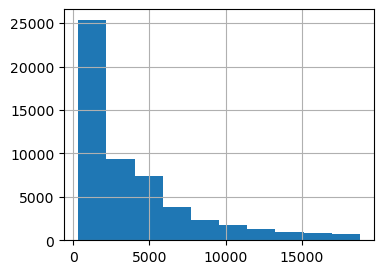

In [10]:
diamondPricesData['price'].hist(figsize=(4,3))

The distribution is Positively skewed and is satisfactory to proceed further

# Basic Data Exploration
This step is to have an overview of the data

In [11]:
diamondPricesData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [12]:
diamondPricesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
diamondPricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53940.000000,53940.000000,53940,53934,53940,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11286,13065,NaN,NaN,NaN,NaN,NaN
mean,3932.799722,0.797940,NaN,NaN,NaN,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,NaN,NaN,NaN,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


In [14]:
diamondPricesData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

# Basic Data Exploration Results

- price: Continuous. Selected. This is the Target Variable!
- carat: Continuous. Selected.
- cut: Categorical. Selected.
- color: Categorical. Selected.
- clarity: Categorical. Selected.
- depth: Continuous. Selected.
- table: Continuous. Selected.
- x: Continuous. Selected.
- y: Continuous. Selected.
- z: Continuous. Selected.

# Visual Exploratory Data Analysis


### Categorical Variables
Categorical Variables are cut, color, clarity

In [15]:
# We will use bar plots to see the data distribution for the categorical variables
# We will define a function so that we could plot the bar charts in one go

def PlotBarCharts(inpData, colsToPlot):
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar Charts of: ' + str(colsToPlot))
    
    for colName, plotNum in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subplot[plotNum])

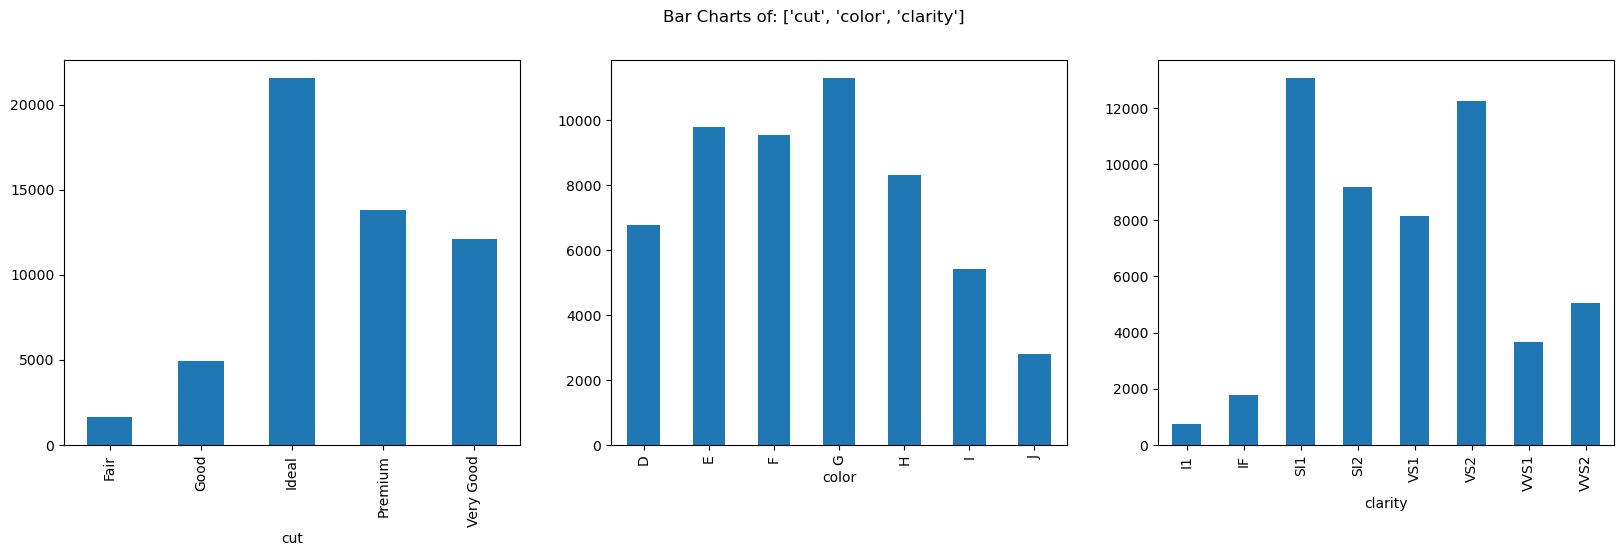

In [16]:
PlotBarCharts(inpData=diamondPricesData, colsToPlot=['cut', 'color', 'clarity'])

As each of the categories have comparable frequencies, we can proceed further with all three of them

### Continuous Variables
Continuous Variables are carat, depth, table, x, y, z

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

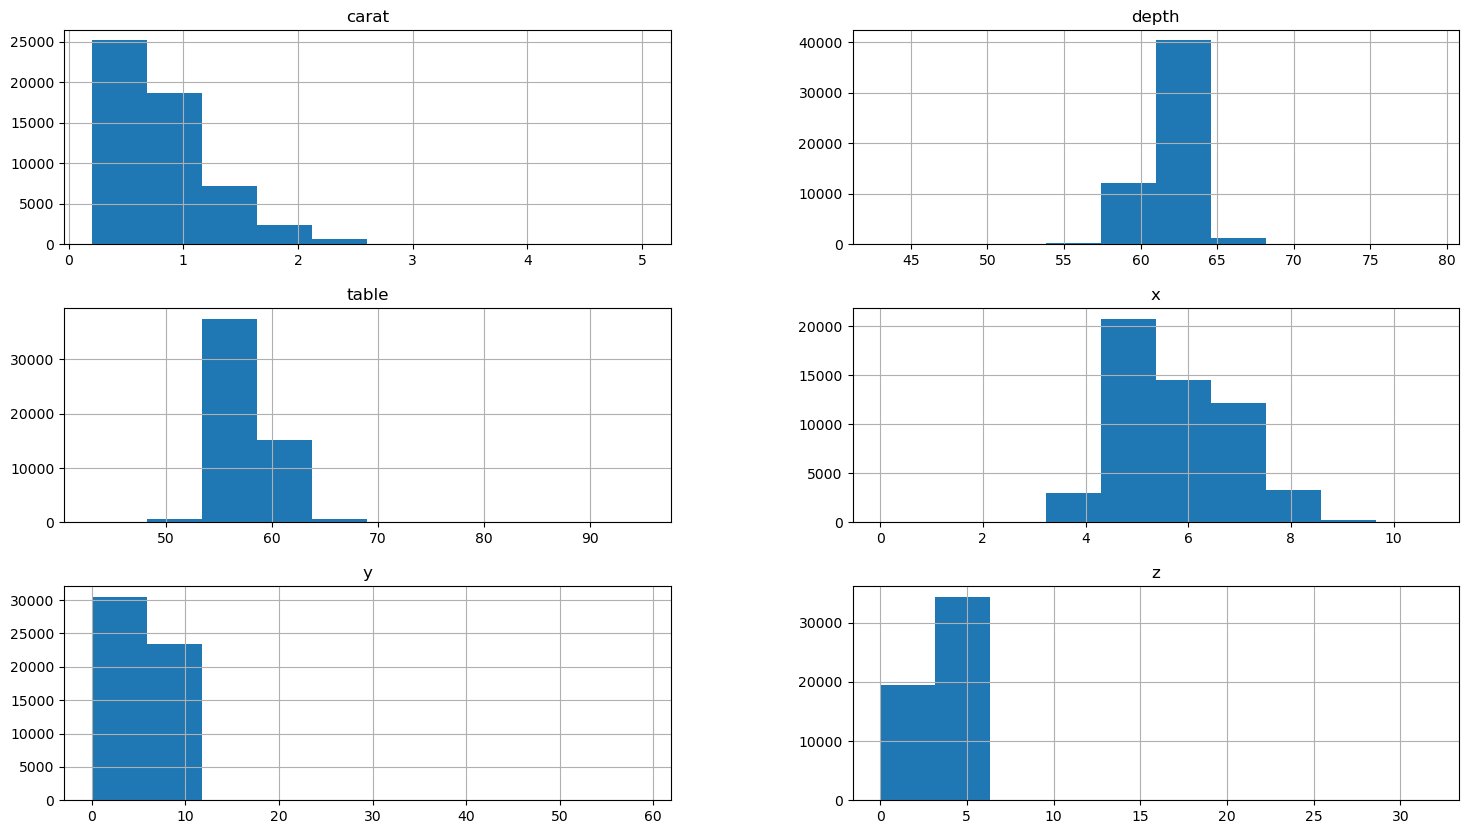

In [17]:
contVar = ['carat', 'depth', 'table', 'x', 'y', 'z']

diamondPricesData.hist(column=contVar, figsize=(18,10))

- <b>carat:</b> Distribution is good
- <b>depth:</b> Distribution is good
- <b>table:</b> Distribution is good
- <b>x:</b> Outliers seen near 0, need to treat them.
- <b>y:</b> Outliers seen beyond 20, need to treat them.
- <b>z:</b> Outliers seen beyond 10, need to treat them.

# Outlier Treatment
Outliers bias the training of machine learning model. Teating them will bring more accurate outcomes

### Outlier Treatment - x

In [18]:
# Number of outliers
len(diamondPricesData['x'][diamondPricesData['x'] < 2])

8

In [19]:
# Getting the value near 2
diamondPricesData['x'][diamondPricesData['x'] > 2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53932, dtype: float64

In [20]:
# Replacing the values with the nearest value
diamondPricesData['x'][diamondPricesData['x']<3.73] = 3.73

### Outlier Treatment - y

In [21]:
# Number of outliers
len(diamondPricesData['y'][diamondPricesData['y'] > 20])

2

In [22]:
# Getting the value near 20
diamondPricesData['y'][diamondPricesData['y'] < 20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
15951     0.00
24520     0.00
49556     0.00
49557     0.00
27429     0.00
Name: y, Length: 53938, dtype: float64

In [23]:
# Replacing the values with the nearest value
diamondPricesData['y'][diamondPricesData['y'] > 20] = 10.54

### Outlier Treatment - z

In [24]:
# Number of outliers
len(diamondPricesData['z'][diamondPricesData['z'] > 7])

2

In [25]:
# Getting the value near 10
diamondPricesData['z'][diamondPricesData['z'] < 7].sort_values(ascending=False)

27415    6.98
27630    6.72
27130    6.43
23644    6.38
26444    6.31
         ... 
5471     0.00
24394    0.00
13601    0.00
2314     0.00
49557    0.00
Name: z, Length: 53938, dtype: float64

In [26]:
# Replacing the values with the nearest value
diamondPricesData['z'][diamondPricesData['z'] > 7] = 6.98

# Visualizing distribution after Outlier Treatment

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

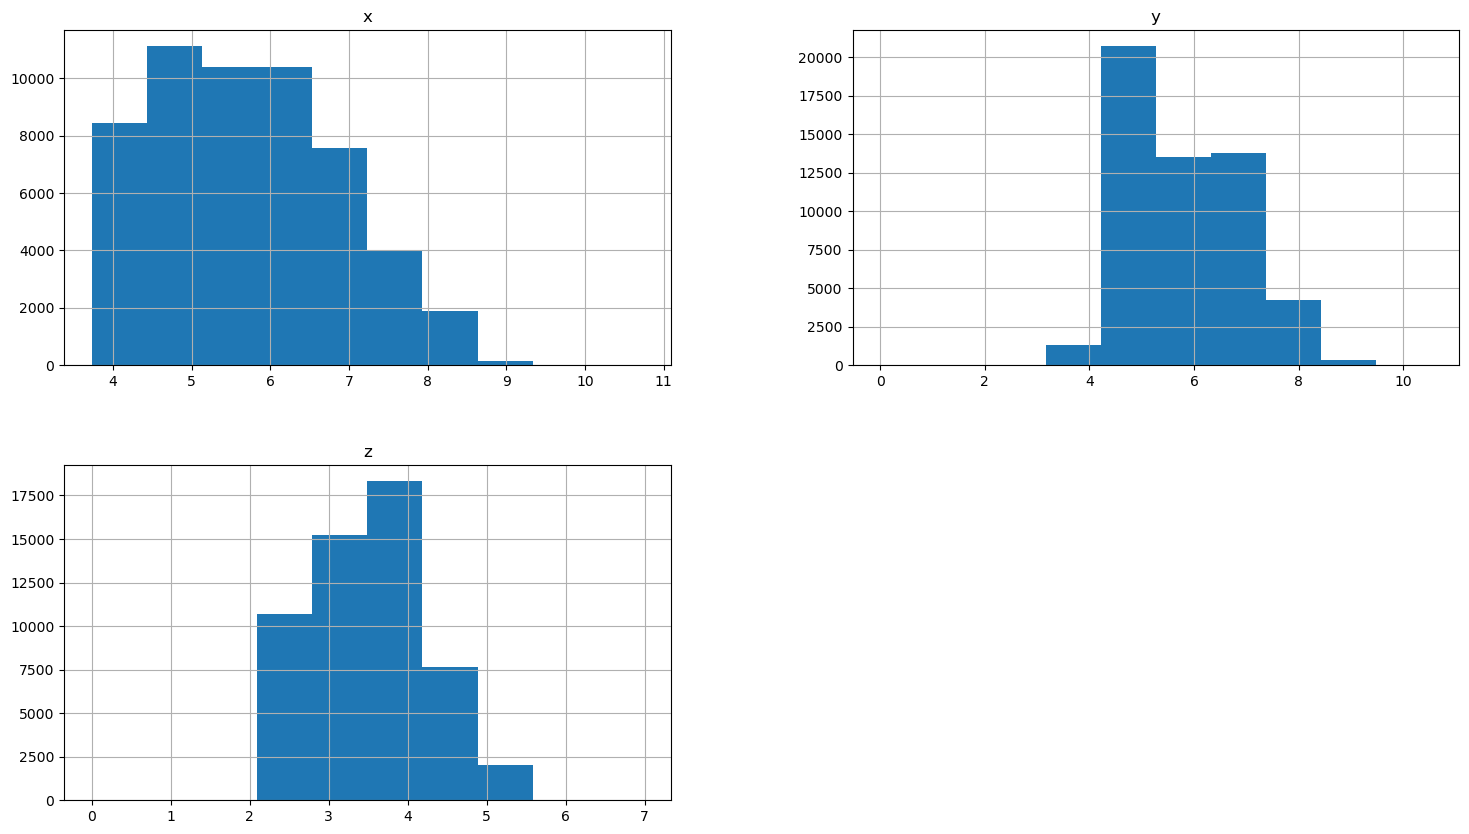

In [27]:
diamondPricesData.hist(column=['x','y','z'], figsize=(18,10))

# Missing Values Treatment

In [28]:
diamondPricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [29]:
diamondPricesData['color'].fillna(value=diamondPricesData['color'].mode()[0], inplace=True)
diamondPricesData['depth'].fillna(value=diamondPricesData['depth'].median(), inplace=True)

In [30]:
diamondPricesData.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Feature Selection
In this case, these two will be used:
- Continuous vs Continuous (Pearson's Correlation matrix)
- Categorical vs Continous (ANOVA Test)

### Relationship Exploration: Continous vs Continous - Scatter Plots

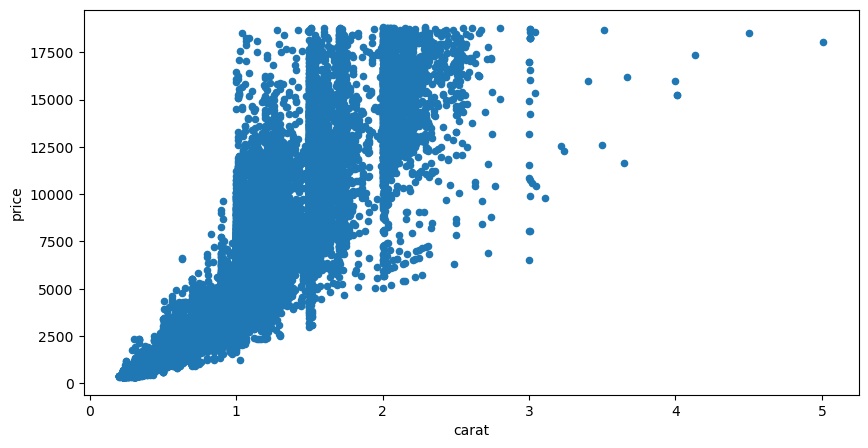

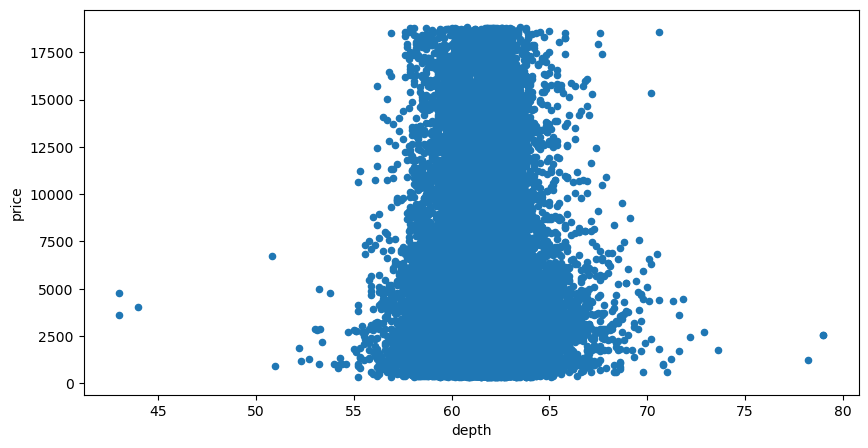

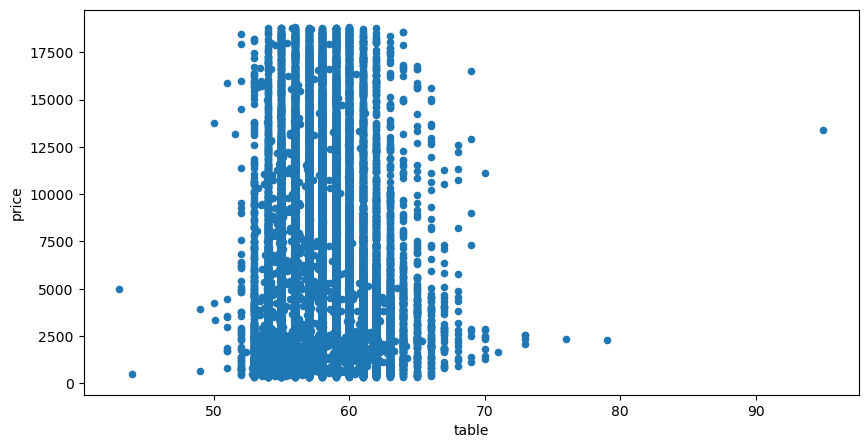

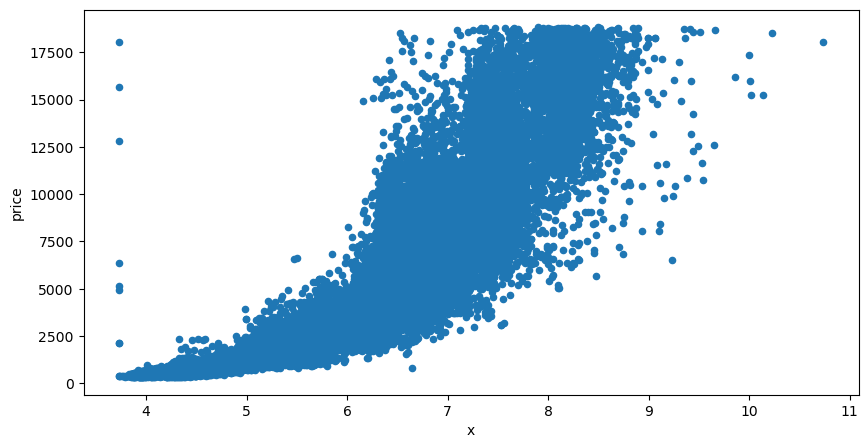

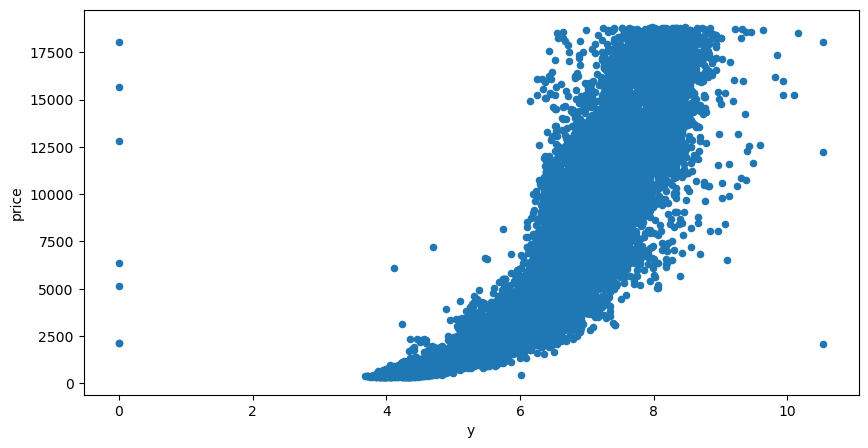

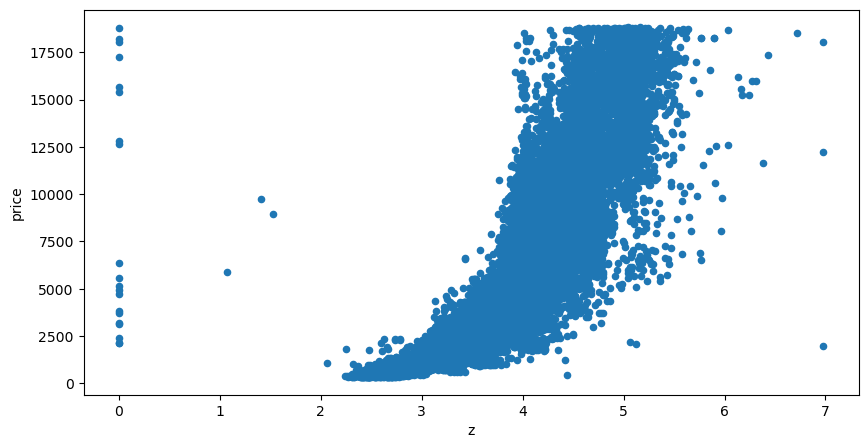

In [31]:
contVar = ['carat', 'depth', 'table', 'x','y','z']

for i in contVar:
    diamondPricesData.plot.scatter(x=i, y='price', figsize=(10,5))
    

In [32]:
# Creating a filter to remove outliers from data
filterData = (diamondPricesData['z']>2.06) & (diamondPricesData['z']<6.5)
diamondPricesData = diamondPricesData[filterData]

### Visualizing again after filtering

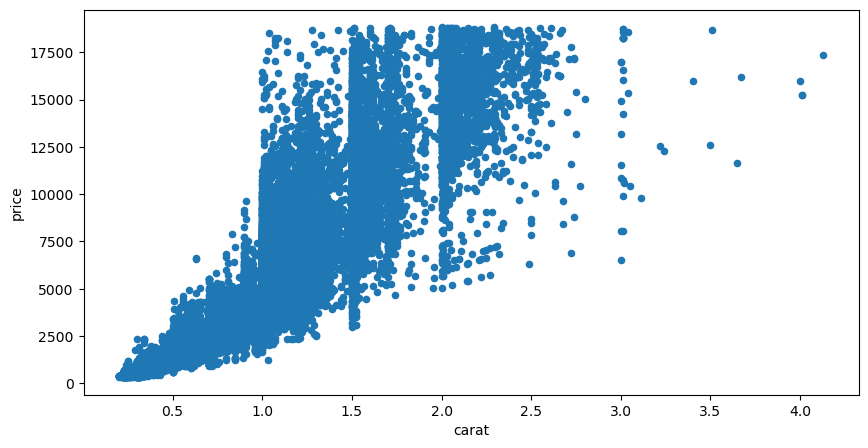

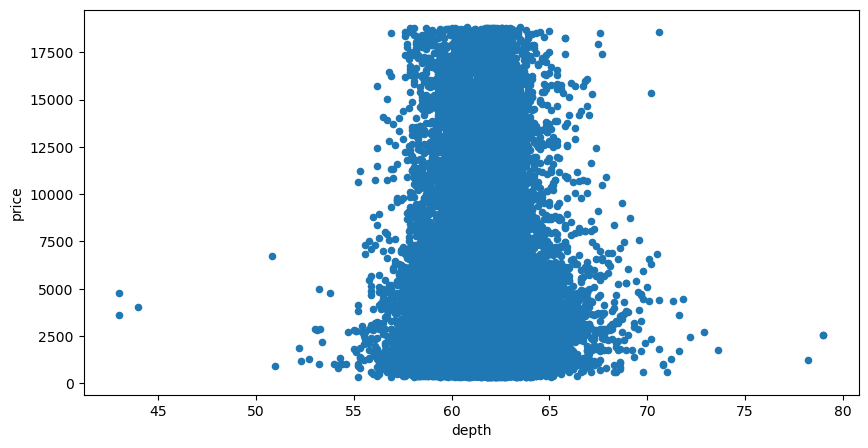

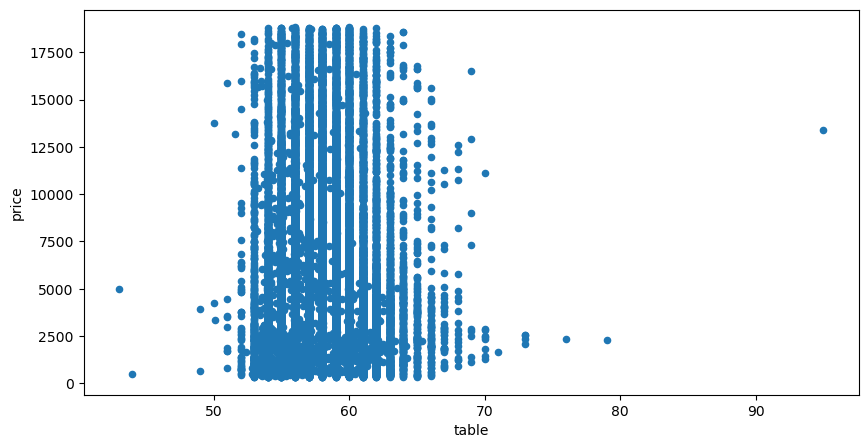

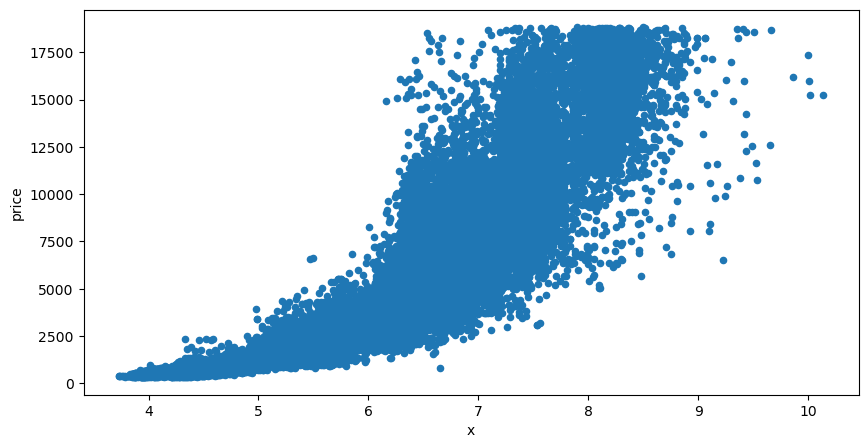

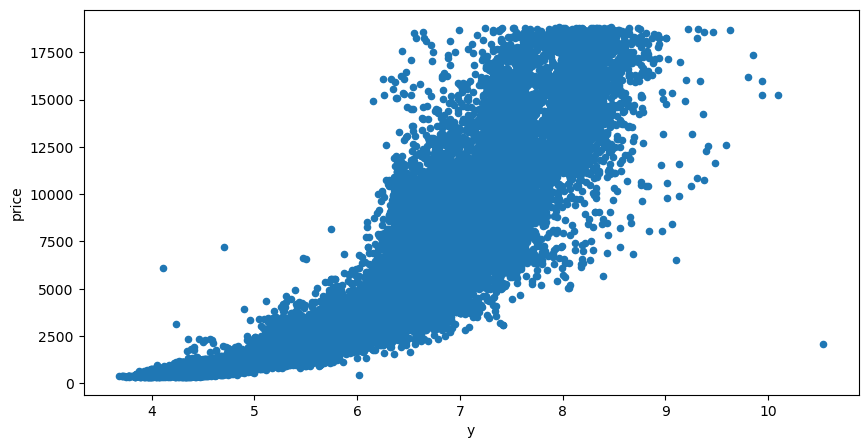

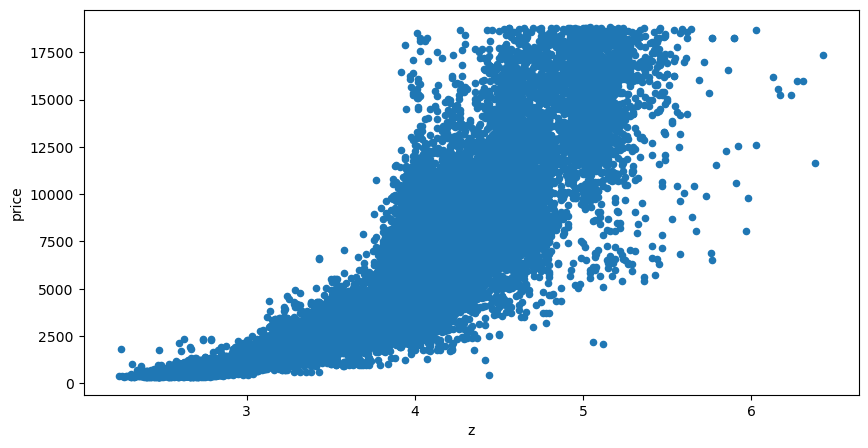

In [33]:
contVar = ['carat', 'depth', 'table', 'x','y','z']

for i in contVar:
    diamondPricesData.plot.scatter(x=i, y='price', figsize=(10,5))

### Statistical Feature Selection

In [34]:
# Continous vs Continous - Pearson's Correlation Matrix

contVar = ['price','carat', 'depth', 'table', 'x','y','z']
corrData = diamondPricesData[contVar].corr()
corrData

,price,carat,depth,table,x,y,z
price,1.000000,0.921887,-0.011008,0.127275,0.887157,0.888561,0.882473
carat,0.921887,1.000000,0.027587,0.181810,0.978055,0.976929,0.977127
depth,-0.011008,0.027587,1.000000,-0.295761,-0.025321,-0.028439,0.096262
table,0.127275,0.181810,-0.295761,1.000000,0.196165,0.189877,0.155726
x,0.887157,0.978055,-0.025321,0.196165,1.000000,0.998439,0.991559
y,0.888561,0.976929,-0.028439,0.189877,0.998439,1.000000,0.991253
z,0.882473,0.977127,0.096262,0.155726,0.991559,0.991253,1.000000


In [35]:
# Filtering only those variables having correlation > 50%
corrData['price'][abs(corrData['price']) > 0.5]

price    1.000000
carat    0.921887
x        0.887157
y        0.888561
z        0.882473
Name: price, dtype: float64

In [36]:
# Final selected variables: carat, x, y, z

### Relationship Exploration: Categorical vs Continuous - Box Plot

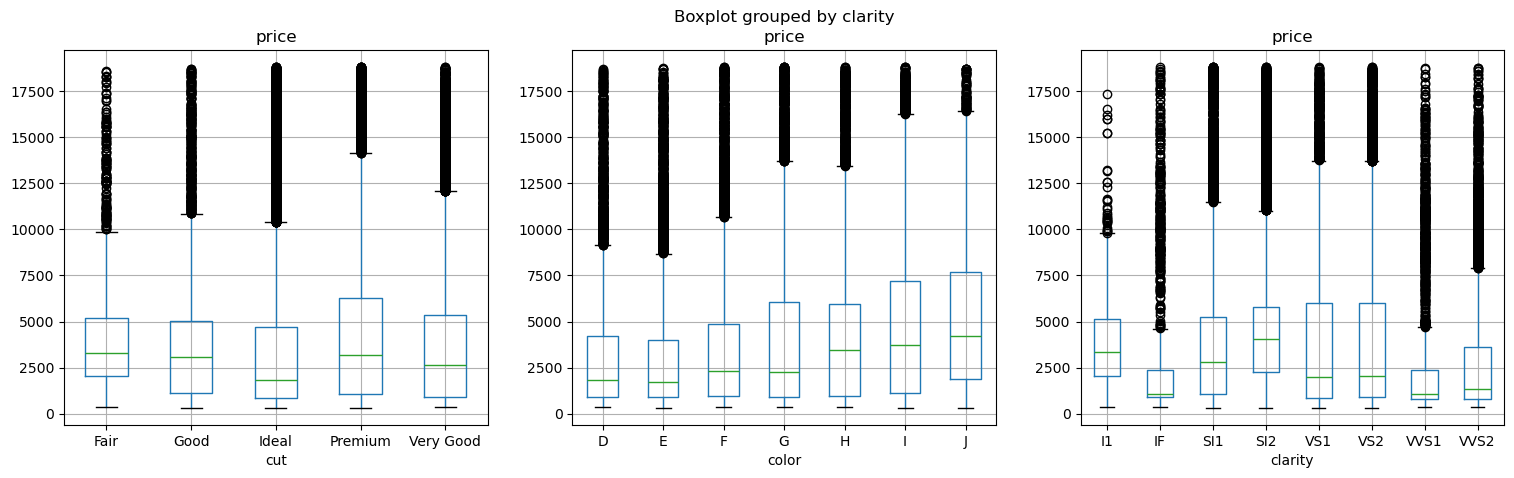

In [37]:
catgVar = ['cut', 'color', 'clarity']

fig, subplot = plt.subplots(nrows=1, ncols=len(catgVar), figsize=(18,5))

for boxPlot, plotArea in zip(catgVar, range(len(catgVar))):
    diamondPricesData.boxplot(column='price', by=boxPlot, ax=subplot[plotArea])

The distribution is misaligned. Hence, the varibales are correlated to each other

### Statistical Feature Selection

In [38]:
# Categorical vs Continuous - ANOVA Test
# Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric

In [39]:
# We will define a formula to get the ANOVA results for all the variables

def ANOVA(inpData, targetVar, catgVar):
    
    from scipy.stats import f_oneway
    
    selectedVar = []
    
    print('###### ANOVA RESULTS ######')
    print()
    
    for var in catgVar:
        groupedData = inpData.groupby(var)[targetVar].apply(list)
        anovaResult = f_oneway(*groupedData)
        
        if anovaResult[1] < 0.05:
            print(var, 'is CORRELATED with', targetVar, '| P-Value:', anovaResult[1])
            selectedVar.append(var)
            
        else:
            print(var, 'is NOT CORRELATED with', targetVar, '| P-Value:', anovaResult[1])
            
    return(selectedVar)

In [40]:
ANOVA(diamondPricesData, 'price', catgVar)

###### ANOVA RESULTS ######

cut is CORRELATED with price | P-Value: 1.1724065351734302e-148
color is CORRELATED with price | P-Value: 0.0
clarity is CORRELATED with price | P-Value: 3.09531994e-316


['cut', 'color', 'clarity']

# Selecting final variables for Machine Learning

In [41]:
selectedCols = ['carat', 'x','y','z','cut', 'color', 'clarity']

dataForML = diamondPricesData[selectedCols]
dataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [42]:
# Saving this data for deployment
dataForML.to_pickle('dataForML.pkl')

# Data Pre Processing for Machine Learning

### Converting the Ordinal Variable to Numeric

In [43]:
# Looking at the unique values of ordinal column - cut
dataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [44]:
# Replacing the ordinal values
dataForML['cut'].replace({'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5}, inplace=True)

In [45]:
# Looking at the unique values of ordinal column - color
dataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [46]:
# Replacing the ordinal values
dataForML['color'].replace({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, inplace=True)

In [47]:
# Looking at the unique values of ordinal column - clarity
dataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [48]:
# Replacing the ordinal values
dataForML['clarity'].replace({'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8}, inplace=True)

### Converting the Nominal Variables to Numeric using get_dummies()

In [49]:
dataForML_Numeric = pd.get_dummies(dataForML)

# Adding the target variable in the final numeric data
dataForML_Numeric['price'] = diamondPricesData['price']

# Final Sample data 
dataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


# Machine Learning: Splitting the data into Training and Testing Sample

In [50]:
# We will keep 70% of the data for training and rest 30% for testing the accuracy of the model

dataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [51]:
targetvariable = 'price'
predictors = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

x = dataForML_Numeric[predictors].values
y = dataForML_Numeric[targetvariable].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37738, 7)
(37738,)
(16174, 7)
(16174,)


# Multiple Linear Regression

In [56]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()


# Creating the model on training data
LREG = regModel.fit(x_train, y_train)


# Calculating the goodness of fit of training data
from sklearn import metrics
print('The r2 Score is: ', round(metrics.r2_score(y_train, LREG.predict(x_train)),2))
print('-'*100)


# Printing some sample values of prediction
prediction = LREG.predict(x_test)
testingResult = pd.DataFrame(data=x_test, columns=predictors)
testingResult[targetvariable] = y_test
testingResult['Predicted '+ targetvariable] = np.round(prediction,1)
print(testingResult.head())


# Calculating the error of each row
testingResult['APE'] = abs((testingResult[targetvariable]-testingResult['Predicted '+ targetvariable])/
                        testingResult[targetvariable])*100

# Mean and Median of APE
MAPE = testingResult['APE'].mean()
medianAPE = testingResult['APE'].median()

# Mean and Median Accuracy
accMAPE = 100 - MAPE
accmedianAPE = 100 - medianAPE

print('Mean Accuracy is ', round(accMAPE,1))
print('Median Accuracy is ', round(accmedianAPE,1))
print('-'*100)


# Defining a custom function for calculating Accuracy
def accuracy(actual, predicted):
    MAPE = np.mean(np.abs((actual-predicted)/actual)*100)
    return (100 - MAPE)

from sklearn.metrics import make_scorer
custom_scorer = make_scorer(accuracy, greater_is_better=True)


# Running K fold cross validation on the algorithm
from sklearn.model_selection import cross_val_score
accuracy_values = cross_val_score(regModel, x, y, cv=10, scoring=custom_scorer)
print(accuracy_values)
print('The Final Average Accuracy of the model is:', round(accuracy_values.mean(),1))

The r2 Score is:  0.89
----------------------------------------------------------------------------------------------------
   carat     x     y     z  cut  color  clarity  price  Predicted price
0   0.94  6.35  6.32  3.81  5.0    3.0      5.0   4548           4968.4
1   0.70  5.72  5.76  3.47  2.0    4.0      4.0   2287           2827.5
2   0.30  4.37  4.33  2.67  4.0    5.0      4.0    844             26.5
3   0.90  6.05  6.01  3.87  1.0    3.0      2.0   3290           2990.1
4   0.26  4.07  4.11  2.56  2.0    6.0      7.0    597           1270.5
Mean Accuracy is  59.5
Median Accuracy is  77.6
----------------------------------------------------------------------------------------------------
[61.45927451 69.61348617 78.84784973 75.8646412  75.41339837 16.77003452
 29.75636244 41.38598748 55.87339271 65.06785461]
The Final Average Accuracy of the model is: 57.0


# Decision Tree

The r2 score is:  0.94
Mean Accuracy is:  83.7
Median Accuracy is:  87.2
The final average accuracy of the model is:  75.7


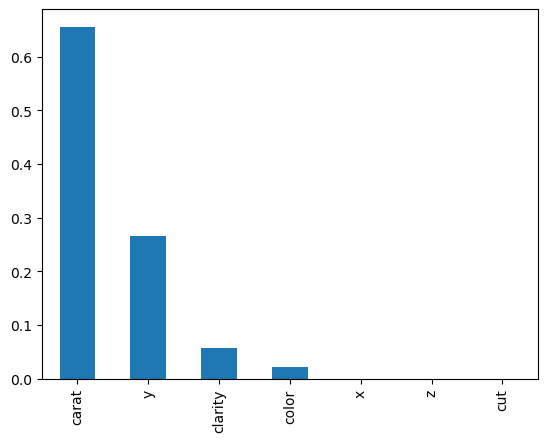

In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
regModel = DecisionTreeRegressor(max_depth=5, criterion='squared_error')


# Creating the model on the training data
DT = regModel.fit(x_train, y_train)


# Calculating the goodness of fit
from sklearn.metrics import r2_score
print('The r2 score is: ', round(metrics.r2_score(y_train, DT.predict(x_train)),2))

feature_Importance = pd.Series(DT.feature_importances_, index=predictors)
feature_Importance.nlargest(10).plot(kind='bar')


# Printing some sample values of prediction
prediction = DT.predict(x_test)
testingResult = pd.DataFrame(data=x_test, columns=predictors)
testingResult[targetvariable] = y_test
testingResult['Predicted '+ targetvariable] = np.round(prediction,1)
testingResult.head()


# Calculating the error of each row
testingResult['APE'] = abs((testingResult[targetvariable]-testingResult['Predicted '+ targetvariable])/
                        testingResult[targetvariable])*100

# Mean and Median of APE
MAPE = testingResult['APE'].mean()
medianAPE = testingResult['APE'].median()

# Accuracy of APE
accMAPE = 100 - MAPE
accMedianAPE = 100 - medianAPE

print('Mean Accuracy is: ', round(accMAPE,1))
print('Median Accuracy is: ', round(accMedianAPE,1))


# Defining a custom accuracy function
def accuracy(actual, prediction):
    MAPE = np.mean(abs((actual-prediction)/actual)*100)
    return (100 - MAPE)

from sklearn.metrics import make_scorer
custom_scorer = metrics.make_scorer(accuracy, greater_is_better=True)

# Running a k fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_values = cross_val_score(regModel, x, y, cv=10, scoring=custom_scorer)
accuracy_values
print('The final average accuracy of the model is: ', round(accuracy_values.mean(),1))


## Plotting Decision Tree

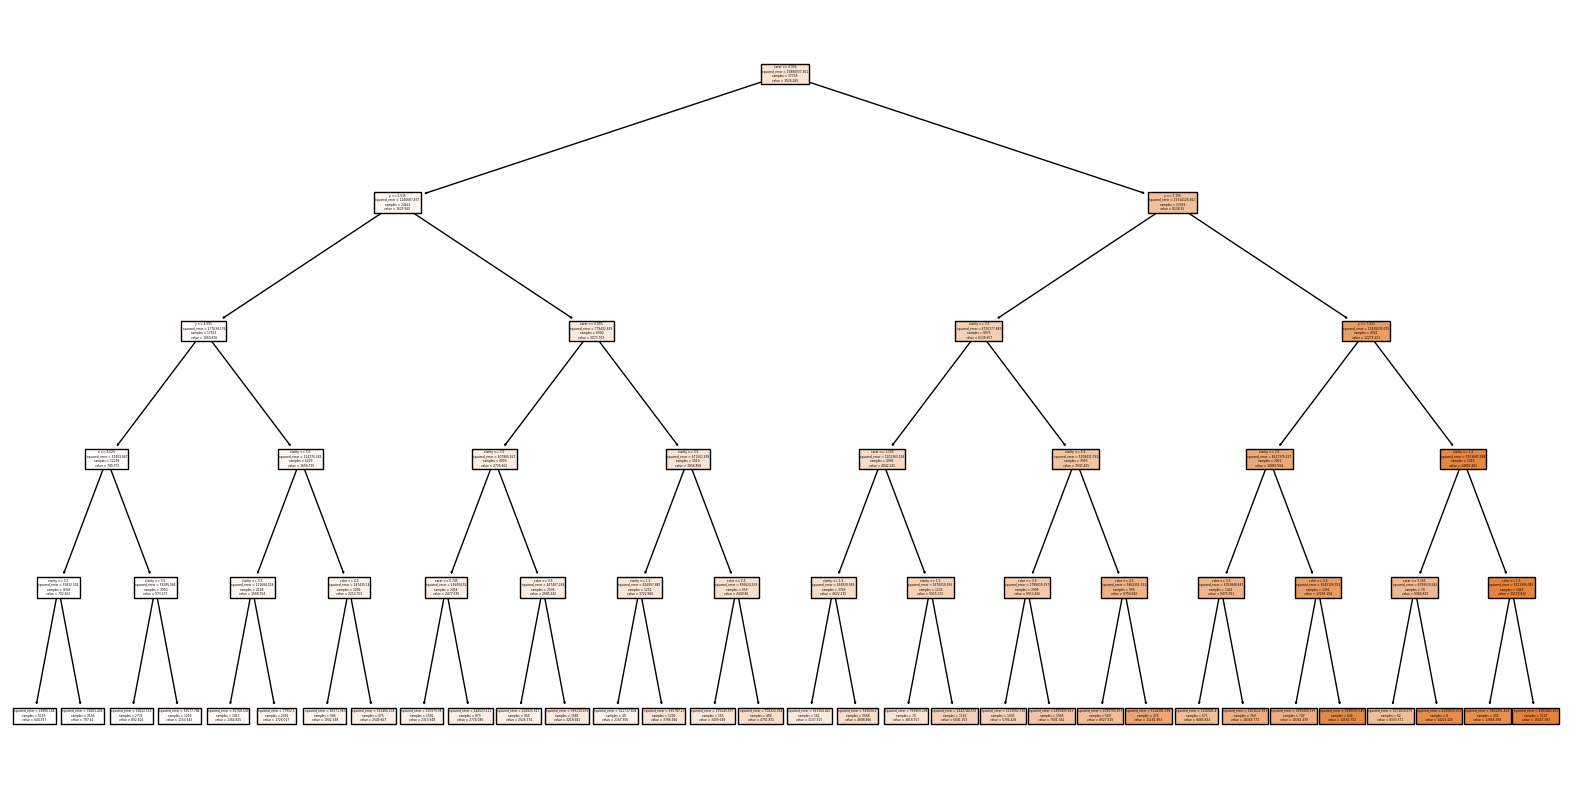

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(regModel, feature_names=predictors, class_names=targetvariable, filled=True)
plt.savefig('DecisionTreeDiamondPricesPrediction.png', dpi=300)
plt.show()